In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [6]:
data = pd.read_csv('glass.csv')
print(data.head())
print(data.describe())

        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1
               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516523   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000  

In [7]:
print(data.isnull().count())
print(data.info())

RI      214
Na      214
Mg      214
Al      214
Si      214
K       214
Ca      214
Ba      214
Fe      214
Type    214
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB
None


In [9]:
print(np.unique(data['Type']))

[1 2 3 5 6 7]


In [12]:
print((data['Ba'] == 0).sum()/len(data))
print((data['Fe'] == 0).sum()/len(data))

0.822429906542056
0.6728971962616822


In [14]:
data.drop('Ba', axis=1, inplace = True)
data.drop('Fe', axis=1, inplace = True)

In [15]:
print(data)

          RI     Na    Mg    Al     Si     K    Ca  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07     1
..       ...    ...   ...   ...    ...   ...   ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62     7

[214 rows x 8 columns]


In [27]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42, test_size=0.3)

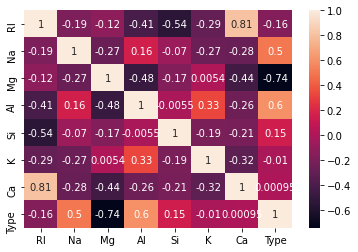

In [28]:
import seaborn as sns

sns.heatmap(data.corr(), annot=True)

In [29]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

svm =SVC(kernel='linear', C=0.8)
svm.fit(x_train,y_train.values.flatten())
y_pred = svm.predict(x_test)

score = accuracy_score(y_test,y_pred)
print(score)

cm = confusion_matrix(y_test, y_pred)
print(cm)

report = classification_report(y_test,y_pred)
print(report)

0.6615384615384615
[[16  3  0  0  0  0]
 [ 6 15  0  0  1  1]
 [ 2  2  0  0  0  0]
 [ 0  4  0  2  0  0]
 [ 0  1  0  1  1  0]
 [ 0  1  0  0  0  9]]
              precision    recall  f1-score   support

           1       0.67      0.84      0.74        19
           2       0.58      0.65      0.61        23
           3       0.00      0.00      0.00         4
           5       0.67      0.33      0.44         6
           6       0.50      0.33      0.40         3
           7       0.90      0.90      0.90        10

    accuracy                           0.66        65
   macro avg       0.55      0.51      0.52        65
weighted avg       0.62      0.66      0.63        65



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
